In [6]:
#Install seaborn to make nicer looking graphics that matplotlib. Seaborn is like the ggplot of python#
import pip
pip.main(['install','seaborn'])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting seaborn

Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

Requirement already satisfied: pandas>=0.25 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from seaborn) (1.4.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from seaborn) (3.6.2)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from seaborn) (1.22.3)

Requirement already satisfied: contourpy>=1.0.1 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.0.5)

Requirement already satisfied: fonttools>=4.22.0 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.25.0)

Requirement already satisfied: python-dateutil>=2.7 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pyparsing>=2.2.1 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.0.9)

Requirement already satisfied: kiwisolver>=1.0.1 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: cycler>=0.10 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: pillow>=6.2.0 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.2.0)

Requirement already satisfied: packaging>=20.0 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.0)

Requirement already satisfied: pytz>=2020.1 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from pandas>=0.25->seaborn) (2022.1)

Requirement already satisfied: six>=1.5 in /home/exouser/.conda/envs/me592/lib/python3.10/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

Installing collected packages: seaborn

Successfully installed seaborn-0.12.2

[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: /home/exouser/.conda/envs/me592/bin/python -m pip install --upgrade pip

0

In [2]:
#Load modules used in this notebook#
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat
import math
import pandas as pd

torch.Size([60000, 28, 28]) torch.Size([60000])
tensor(2)


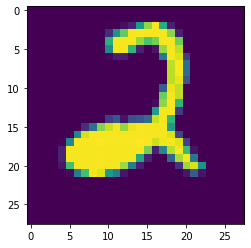

In [6]:
#open torchvision library and import the MNIST dataset. download=True the first time you have to download the dataset#
from torchvision import datasets

#Import dataset#
mnist = datasets.MNIST('./data', train=True, download=False)

#Load data#
mnist = mnist._load_data()

(images, labels) = mnist
print(images.shape, labels.shape)

idx = np.random.randint(432, len(images))
plt.imshow(images[idx])
print(labels[idx])
plt.show()

In [7]:
#Subsample 1000 random images from the MNIST dataset#
sub_idx = np.random.choice(images.shape[0], 1000, replace=False)
mnist_x_sub = images[sub_idx]
mnist_y_sub = labels[sub_idx]

#Each time this cell is run, a new random sample of 1000 images and labels is selected#

Text(0.5, 1.0, 'Classes of 1000 sample MNIST subset')

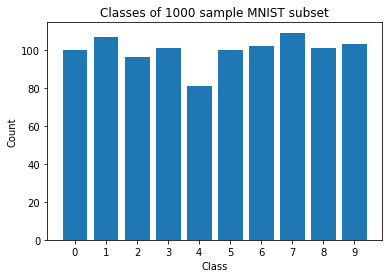

In [8]:
#2.2.2: Plot a histogram of classes#
unique, counts = np.unique(mnist_y_sub, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Classes of 1000 sample MNIST subset")

#This histogram will change everytime it and the cell above, the subsampling, are run due to the random sampling#

In [9]:
#2.1.3: Use einops to batch the subset of MNIST#
#Load einops#
from einops import rearrange, repeat

batching = rearrange(mnist_x_sub, '(b1 b2 b3) w h -> b1 b2 b3 w h', b1=40, b2=25)
batching.shape

torch.Size([40, 25, 1, 28, 28])

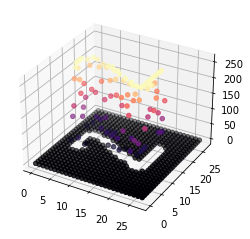

In [16]:
#2.1.4: 3D MNIST Image#
#First import the submodule from matplotlib used for 3D plotting#
from mpl_toolkits import mplot3d
import random
import matplotlib.pyplot as plt

#Record a note I found online about this submodule: "Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines"#

#Select a randome image from MNIST#
rand = random.randint(4, len(mnist_x_sub))
img = mnist_x_sub[rand]

#Plot it out#
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
x, y = np.meshgrid(range(img.shape[0]), range(img.shape[1]), indexing='ij')
ax.scatter(x, y, img, c=img, cmap='magma')
plt.show()

In [17]:
#Start of 2.2 Time Series Data#
#Import the csv file from URL#
#Copy the url for the dataset#
url="https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"

#Use pandas to read the csv from URL#
energy=pd.read_csv(url)

In [16]:
#Lets look at the top of the dataframe to get familiar#
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [18]:
#Open packages for graphing. These are just what I found online, along with pandas, to be useful#
import requests
import matplotlib
import matplotlib.pyplot as plt

In [19]:
#Transform date to datetime format#
#This adds another date column, which allows for a less crowded x-axis#
dates = pd.to_datetime(energy['date'])
energy.loc[:,'DATE'] = dates
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,DATE
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


<Figure size 432x288 with 0 Axes>

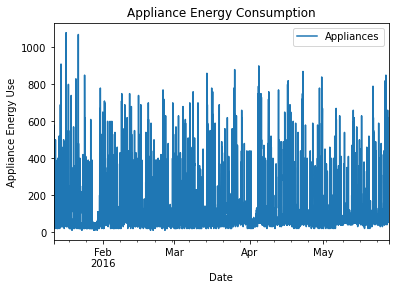

In [20]:
#Gets the graph, but it is NOT pretty#
fig = plt.figure()
energy.plot(x="DATE", y="Appliances")
matplotlib.pyplot.title("Appliance Energy Consumption")
matplotlib.pyplot.xlabel("Date")
matplotlib.pyplot.ylabel("Appliance Energy Use")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

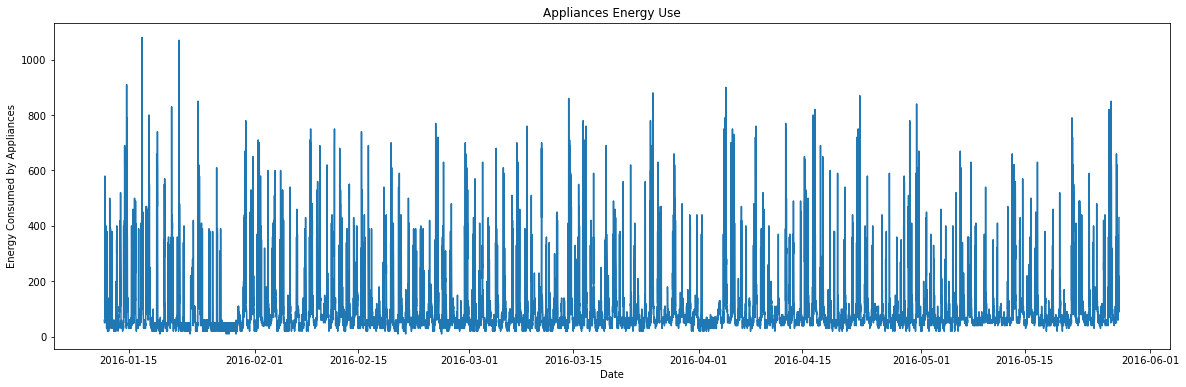

In [22]:
#For a nicer graph, use the seaborn module#
import seaborn as sns
plt.figure(figsize=(20,6))
sns.lineplot(y=energy['Appliances'],x = energy['DATE'],linewidth = 1.5)
plt.xlabel ('Date')
plt.ylabel ('Energy Consumed by Appliances')
plt.title('Appliances Energy Use')
plt.show()

<Figure size 432x288 with 0 Axes>

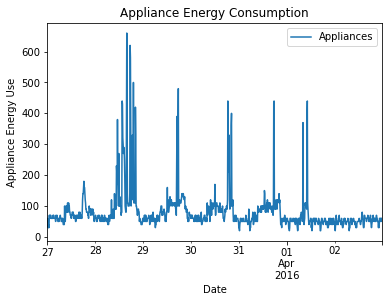

In [21]:
#Subset to a single week of data#

start_date = '2016-03-27 00:00:00'
end_date = '2016-04-02 23:50:00'

mask = (energy["date"] >= start_date) & (energy["date"] <= end_date)         
week = energy[mask]                                                                                                                 

fig = plt.figure()
week.plot(x="DATE", y="Appliances")
matplotlib.pyplot.title("Appliance Energy Consumption")
matplotlib.pyplot.xlabel("Date")
matplotlib.pyplot.ylabel("Appliance Energy Use")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [27]:
#2.2.2: Plot a heatmap#
#First need to add hours to the 'week' dataframe made in 2.2.1#

week['Hour'] = week['DATE'].dt.hour
#Check that hours was actually added#
week.head()

/tmp/ipykernel_2912/1525251015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['Hour'] = week['DATE'].dt.hour


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,DATE,Hour,Day
10842,2016-03-27 00:00:00,60,0,23.000000,41.466667,21.260000,42.590000,23.000000,39.5,20.1,...,746.50,60.000000,8.0,40.000000,5.800000,11.471415,11.471415,2016-03-27 00:00:00,0,Sunday
10843,2016-03-27 00:10:00,60,0,23.000000,41.326667,21.200000,42.530000,23.000000,39.5,20.1,...,746.85,64.833333,8.0,43.833333,5.916667,23.541208,23.541208,2016-03-27 00:10:00,0,Sunday
10844,2016-03-27 00:20:00,30,0,23.000000,41.260000,21.166667,42.590000,23.066667,39.5,20.1,...,747.20,69.666667,8.0,47.666667,6.033333,22.203528,22.203528,2016-03-27 00:20:00,0,Sunday
10845,2016-03-27 00:30:00,30,0,22.926667,41.126667,21.100000,42.617500,23.066667,39.5,20.1,...,747.55,74.500000,8.0,51.500000,6.150000,3.690379,3.690379,2016-03-27 00:30:00,0,Sunday
10846,2016-03-27 00:40:00,40,0,22.890000,41.000000,21.033333,42.626667,23.066667,39.5,20.1,...,747.90,79.333333,8.0,55.333333,6.266667,31.403596,31.403596,2016-03-27 00:40:00,0,Sunday


In [23]:
#Add day of the week to the week dataframe#
week["Day"] = week['DATE'].dt.day_name()

/tmp/ipykernel_2912/2756077722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week["Day"] = week['DATE'].dt.day_name()


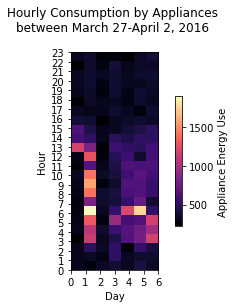

In [70]:
week_gp = week.groupby(['Day', 'Hour'])['Appliances'].sum().reset_index()

pivot = week_gp.pivot(index='Hour', columns='Day', values='Appliances')

# Plot the heatmap#
plt.imshow(pivot, cmap='magma', aspect='0.65', extent=[0,6,0,23])
plt.xlabel('Day')
plt.ylabel('Hour')
weekday_map={0:'SUN', 1:'MON', 2:'TUE', 3:'WED', 4:'THU', 5:'FRI', 6:'SAT'}
plt.title('Hourly Consumption by Appliances \nbetween March 27-April 2, 2016 \n')
cbar = plt.colorbar(shrink = 0.6)
cbar.set_label("Appliance Energy Use")
plt.yticks(range(0,24))
#xs = [0,1,2,3,4,5,6] 
#sorted(ax.get_xticks(minor='both'))

plt.xticks(ticks=[0,1,2,3,4,5,6], labels=weekday_map)

#ax.set_xticks(xs)
#ax.set_xticks([], minor=True)
#ax.set_xticklabels(weekday_map)


plt.show()

/tmp/ipykernel_3038/4086477591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['NSM'] = ((week['DATE'] - week['DATE'].dt.normalize()) / pd.Timedelta('1 second')).astype(int)


NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

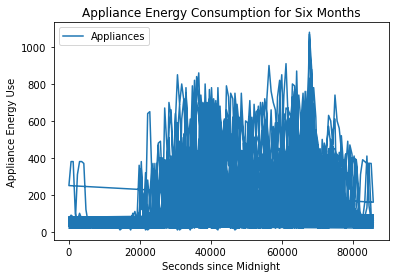

In [27]:
#2.2.4: Create NSM and plot#
#Create columns for numbers of seconds since midnight#
#Lets do this problem for both the full dataframe and for the one week subset#
energy['NSM'] = ((energy['DATE'] - energy['DATE'].dt.normalize()) / pd.Timedelta('1 second')).astype(int)
week['NSM'] = ((week['DATE'] - week['DATE'].dt.normalize()) / pd.Timedelta('1 second')).astype(int)


#Plot it out#
#Plot for full six months of data#
fig = plt.figure()
energy.plot(x="NSM", y="Appliances")
matplotlib.pyplot.title("Appliance Energy Consumption for Six Months")
matplotlib.pyplot.xlabel("Seconds since Midnight")
matplotlib.pyplot.ylabel("Appliance Energy Use")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#Plot for one week of data#
fig = plt.figure()
week.plot(x="NSM", y="Appliances")
matplotlib.pyplot.title("Appliance Energy Consumption for One Week")
matplotlib.pyplot.xlabel("Seconds since Midnight")
matplotlib.pyplot.ylabel("Appliance Energy Use")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

<AxesSubplot: >

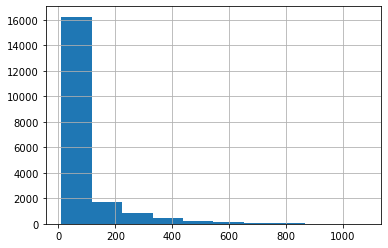

In [28]:
#2.2.3: Plot histogram of energy consumption of appliances#
#Gets a very basic histogram#
energy.Appliances.hist()

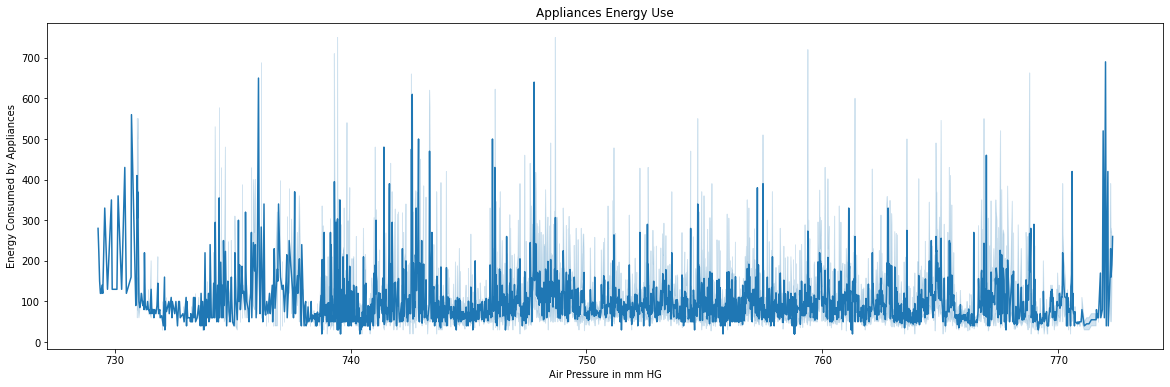

In [30]:
#2.2.5: Plot appliance energy use vs Press_mm_Hg#
plt.figure(figsize=(20,6))
sns.lineplot(y=energy['Appliances'],x = energy['Press_mm_hg'],linewidth = 1.5)
plt.xlabel ('Air Pressure in mm HG')
plt.ylabel ('Energy Consumed by Appliances')
plt.title('Appliances Energy Use')
plt.show()

In [ ]:
#2.2.6: Comment on energy use#
#We can see from the plot of one week with hours since midnight that there are peaks at later hours of the day, such as when people come home from work#
#The number of seconds being a factor of energy consumption is not surprising since there are certain times of the day that energy is more likely to be consumed#
#The air pressure in more surprising, but also plausible. This is mainly because high and low pressure fronts can create adverse weather#
#The adverse weather could be a heatwave or cold snap, which would increase use of certain appliances#

In [31]:
#Start of code for question 3: airfoil data#
#Set the url path to where the data is located#
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'

#Need to define column headers from the following input in the homework PDF#
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

#Read the data into a dataset#
airfoil_dataset = pd.read_csv(url_file, sep='\t', header=None, names=columns)

In [32]:
#Lets look at the head of the dataset to ensure it imported properly#
airfoil_dataset.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [33]:
#Calculate descriptive stats for all columns. This includes the mean, std, and median as asked in class#

des_stats = airfoil_dataset.describe(include='all')
print(des_stats)

#Cells below this demonstrate how to indivdually get each stat from the data#

          frequency  angle_of_attack  chord_length  free_stream_velocity  \
count   1503.000000      1503.000000   1503.000000           1503.000000   
mean    2886.380572         6.782302      0.136548             50.860745   
std     3152.573137         5.918128      0.093541             15.572784   
min      200.000000         0.000000      0.025400             31.700000   
25%      800.000000         2.000000      0.050800             39.600000   
50%     1600.000000         5.400000      0.101600             39.600000   
75%     4000.000000         9.900000      0.228600             71.300000   
max    20000.000000        22.200000      0.304800             71.300000   

       suction_side_displacement_thickness  scaled_sound_pressure_level  
count                          1503.000000                  1503.000000  
mean                              0.011140                   124.835943  
std                               0.013150                     6.898657  
min                

In [34]:
#Calculates and prints mean of all columns in the dataframe#
means = airfoil_dataset[columns].mean()
print(means)

frequency                              2886.380572
angle_of_attack                           6.782302
chord_length                              0.136548
free_stream_velocity                     50.860745
suction_side_displacement_thickness       0.011140
scaled_sound_pressure_level             124.835943
dtype: float64


In [35]:
#Calculate and prints the variance of all columns#
#Change .var to .std for standard deviation#
var = airfoil_dataset[columns].var()
print(var)

frequency                              9.938717e+06
angle_of_attack                        3.502424e+01
chord_length                           8.749868e-03
free_stream_velocity                   2.425116e+02
suction_side_displacement_thickness    1.729287e-04
scaled_sound_pressure_level            4.759146e+01
dtype: float64


In [36]:
#Calculate and prints the medians of all columns#
median = airfoil_dataset[columns].median()
print(median)
#Note to self, could also use .quantile(q=0.50) in place of .median#

frequency                              1600.000000
angle_of_attack                           5.400000
chord_length                              0.101600
free_stream_velocity                     39.600000
suction_side_displacement_thickness       0.004957
scaled_sound_pressure_level             125.721000
dtype: float64


In [37]:
#Calculates and prints the kurtosis of all columns#
kurt = airfoil_dataset.kurtosis()
print(kurt)

frequency                              5.708685
angle_of_attack                       -0.412951
chord_length                          -1.037964
free_stream_velocity                  -1.563951
suction_side_displacement_thickness    2.218903
scaled_sound_pressure_level           -0.314187
dtype: float64


In [38]:
#Calculates and prints the skewness of all columns#
skew = airfoil_dataset.skew()
print(skew)

frequency                              2.137084
angle_of_attack                        0.689164
chord_length                           0.457457
free_stream_velocity                   0.235852
suction_side_displacement_thickness    1.702165
scaled_sound_pressure_level           -0.418952
dtype: float64


In [39]:
#Calculate range by finding the max and subtracting the min, then print the range for all columns#
ran = airfoil_dataset.max()-airfoil_dataset.min()
print(ran)

frequency                              19800.000000
angle_of_attack                           22.200000
chord_length                               0.279400
free_stream_velocity                      39.600000
suction_side_displacement_thickness        0.058011
scaled_sound_pressure_level               37.607000
dtype: float64


In [4]:
#import pip
#pip.main(['install','git'])



ModuleNotFoundError: No module named 'git'

In [5]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)